In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
from clort import ArgoverseDataset
from clort.clearn.data.cltracking import ContrastiveLearningTracking
from argoverse.utils.camera_stats import CAMERA_LIST, RING_CAMERA_LIST
from clort import ArgoverseObjectDataFrame
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import open3d as o3d

In [56]:
root = '../../../datasets/argoverse-tracking/train1/'

In [90]:
dataset = ContrastiveLearningTracking(root, occlusion_thresh = 30., central_crop=True, img_tr_ww = 0.7, image_size_threshold=100)

INFO - 2022-04-03 19:50:02,891 - synchronization_database - Building SynchronizationDB
INFO - 2022-04-03 19:50:03,322 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
WARNING - 2022-04-03 19:50:03,513 - synchronization_database - No corresponding stereo image at 315967661819717000: 176.11195999999998 > 100.0 ms
WARNING - 2022-04-03 19:50:03,516 - synchronization_database - No corresponding stereo image at 315967661819717000: 176.107928 > 100.0 ms
INFO - 2022-04-03 19:50:04,033 - vector_map_loader - Loaded root: ArgoverseVectorMap
INFO - 2022-04-03 19:50:05,245 - vector_map_loader - Loaded root: ArgoverseVectorMap


In [91]:
dataset.dataset_init(0, 5)

INFO - 2022-04-03 19:50:08,617 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,618 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,634 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,635 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,656 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,658 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,676 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,677 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,694 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:08,695 - argoverse_tracking_loader - syncronizing camera and lidar 

INFO - 2022-04-03 19:50:21,274 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:21,277 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:21,297 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:21,298 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:21,312 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:21,313 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:21,342 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-04-03 19:50:21,342 - argoverse_tracking_loader - syncronizing camera and lidar sensor...


In [92]:
dataset.__len__()

24

In [93]:
data_inst, track_id = dataset.__getitem__(11)

In [97]:
img, lidar = data_inst[0]

In [98]:
img_npy = img.numpy()

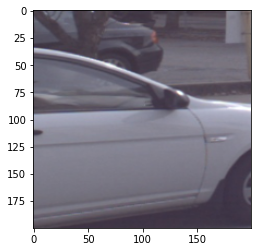

In [99]:
plt.imshow(np.transpose(img_npy[:3, :, :], (1, 2, 0)))
plt.show()

In [89]:
img_npy.shape

(21, 200, 200)

In [29]:
data_inst[0][1].numpy()

array([[ 0.14322005,  0.6303592 ,  0.45744306],
       [ 0.12040436,  0.82470685, -0.39459413],
       [-0.14277543,  0.65478146, -0.3865096 ],
       [-0.1870984 ,  0.32491258, -0.38495725],
       [-0.14413728,  0.15518901, -0.38616914],
       [-0.07116593,  0.736663  , -0.10480685],
       [-0.10084427,  0.06732801, -0.10366828],
       [-0.10417832, -0.61062336, -0.10339338],
       [-0.09652222, -0.780424  , -0.10356695],
       [-0.0940503 , -0.95027816, -0.1036479 ],
       [ 0.15493117,  0.6908451 ,  0.17392902],
       [-0.06482209,  0.52138066,  0.17812352],
       [-0.12911119,  0.36078566,  0.17941956],
       [-0.15009584,  0.18321863,  0.17991106],
       [-0.16139497, -0.1466249 ,  0.18028788],
       [-0.14830293, -0.32465854,  0.18011336],
       [-0.11563767, -0.49479106,  0.17956363],
       [-0.09529007, -0.65634894,  0.17923151],
       [ 0.10807144, -0.8323785 ,  0.17549627],
       [-0.02745713,  0.8079657 , -0.5012006 ],
       [-0.01084412,  0.6450235 , -0.501

In [47]:
main_dfs = []
for key, dfs in dataset.tracking_queue.items():
    if dfs[0].is_valid():
        main_dfs += [dfs[0]]

print(f'{len(main_dfs)} Valid Dataframes')

29 Valid Dataframes


In [45]:
pcd1, pcd2 = o3d.geometry.PointCloud(), o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(data_inst[0][1].numpy())
pcd2.points = o3d.utility.Vector3dVector(data_inst[1][1].numpy())

In [46]:
o3d.visualization.draw_geometries([pcd1, pcd2])

In [43]:
pcd_l = []
for dat in data_inst:
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(dat[1].numpy())
    pcd_l += [pcd]

In [44]:
o3d.visualization.draw_geometries(pcd_l)

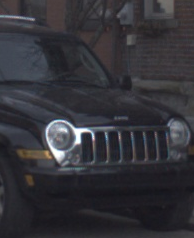

In [23]:
pil_img = Image.fromarray(img)
pil_img

In [43]:
np.shape(pil_img)

(238, 194, 3)

In [56]:
resized_img = np.asarray(pil_img.resize((200, 300), resample=Image.BICUBIC)).astype(np.float32).transpose(2, 0, 1)/255.

In [57]:
resized_img.shape

(3, 300, 200)

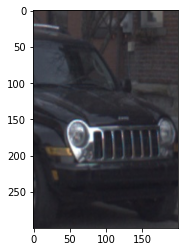

In [58]:
plt.imshow(resized_img.transpose(1, 2, 0))
plt.show()

In [69]:
idx = np.arange(10)
idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
idx = np.random.choice(idx, 5, replace = False)
idx

array([5, 8, 7, 0, 3])

In [72]:
target_ = np.arange(10)
target_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
target_[idx]

array([5, 8, 7, 0, 3])

In [121]:
list(dataset.tracking_queue.keys())

['14bade1e-1c38-4986-859a-e5f91b4d5a2a',
 '6194032d-8190-4bd5-8571-f9f81b8b286c',
 '0fae8587-7feb-49f1-8687-a0c9ac1711c0',
 '88bbdf18-b8f3-477e-b1a7-86850399c279',
 'd8d28b47-e829-4157-ae03-0898bca70a04',
 '7b1b0c4c-8813-4e86-b147-3516718e2c66',
 'f8af4fd5-3322-442f-b56f-8f3df7f7c378',
 '1f7bd311-47db-4dab-87b5-c56da9c82950',
 '86c49928-75a4-4250-94e1-539555e2e9ff',
 'de5c826a-42cc-4632-b6d4-049cae2ecb75',
 '5bb5645a-8e30-437d-9db8-9b8eaef1840a',
 'e65ed85b-d921-44d7-8d8d-b40f4d9d3f5a',
 '42cbe07a-4d4a-461e-9110-05af45810235',
 '1a369363-0979-4ee9-84fc-62ca1e357784',
 'e205f2d9-21cd-4ac3-9ab6-b7237ca1d136',
 'f1e39da0-1b81-4e31-ad76-c6d23d010a28',
 'ecd17a4d-2a1f-432b-a433-31822f22a290',
 'af62083b-ff39-4e4a-8b80-c6a8b3836f9f',
 '1f0c364d-333b-431e-a6db-165125b6d4b8',
 '3276f23f-9eb4-478e-a8c2-0010a8f727e8',
 '20b54309-2015-4eae-86b1-eb9ff2a9d513',
 '6636ccde-aee1-48fb-99d0-12bddea0c10d',
 '7c461cda-a4d9-43c1-9cca-2c05dcf1b77f',
 'f2e1195f-6cdf-4928-915b-e3ea123ce189',
 'd19e58ba-2b96-